In [1]:
import pandas as pd
import spacy

In [4]:
# Read the excel data
#my_sheet = 'incident-raw-data1'
#file_name = 'C:\\Users\ShehuU\\Documents\\THCCG files\\summary.xlsx' # name of your excel file
#file_name = 'C:\\Users\\ShehuU\\Documents\\THCCG files\\Economic modelling\\Data quality datasets\\after changing iapt table\\2mhclusterpatientdatasummary.xlsx'
#file_name = 'C:\\Users\\Umar Shehu\\OneDrive\\UNDP\\3\\incident-raw-data.csv'
file_name = 'C:\\Users\\Umar Shehu\\OneDrive\\UNDP\\BPO\\Data\\incident-raw-data-18112019.csv'
#file_name = 'C:\\Users\\hadoop\\Documents\\14alldata.xlsx'
#df0 = read_excel(file_name, sheet_name = my_sheet)
df0 = pd.read_csv(file_name)
#print(df.head()) # shows headers with top 5 rows

#df = pd.read_csv('C:\\Users\\hadoop\\Downloads\\hr_data.csv')
df0.shape

(37771, 35)

In [5]:
df0.columns

Index(['eventdate', 'eventsource', 'division', 'district', 'upazilla', 'union',
       'viol', 'vdir', 'viotypeone', 'viotypetwo', 'weaptypeone',
       'weaptypetwo', 'mtvincidentone', 'mtvincidenttwo', 'crosscutting',
       'perpgroup', 'targgroup', 'actorone', 'actortwo', 'actorone_killed',
       'actorone_injured', 'actortwo_killed', 'actortwo_injured', 'kiltotal',
       'kilfetotal', 'injtotal', 'injfetotal', 'sexasstotal', 'sexassfetotal',
       'abdtotal', 'arresttotal', 'damageproperty', 'intervention',
       'eventdesc', 'eventurl'],
      dtype='object')

In [4]:
#Download and install java jdk 13.0.1
import os
java_path = "C:/Program Files/Java/jdk-13.0.1/bin/java.exe"
os.environ['JAVAHOME'] = java_path

In [5]:
import pandas as pd
import numpy as np
import nltk, re
nltk.download('stopwords') # load english stopwords
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")
warnings.warn("deprecated", DeprecationWarning)
warnings.simplefilter("ignore")

[nltk_data] Downloading package stopwords to C:\Users\Umar
[nltk_data]     Shehu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df1 = pd.read_csv(file_name)

In [7]:
df1.isnull().sum() / len(df1) * 100

eventdate            0.002647
eventsource          0.002647
division             0.002647
district             0.002647
upazilla             0.002647
union                0.849836
viol                 0.002647
vdir                44.175580
viotypeone           0.002647
viotypetwo           0.018532
weaptypeone          0.002647
weaptypetwo          0.002647
mtvincidentone       0.002647
mtvincidenttwo       0.002647
crosscutting         0.002647
perpgroup            0.058244
targgroup            0.021180
actorone             0.002647
actortwo             0.010590
actorone_killed      0.002647
actorone_injured     0.002647
actortwo_killed      0.002647
actortwo_injured     0.002647
kiltotal             0.002647
kilfetotal           0.002647
injtotal             0.002647
injfetotal           0.002647
sexasstotal          0.002647
sexassfetotal        0.002647
abdtotal             0.002647
arresttotal          0.002647
damageproperty      96.931590
intervention        93.172191
eventdesc 

In [10]:
#set engineering feature and target variables for analysis
#engfeat = 'vdir'
targt = 'upazilla'

### Topic Modelling Start

In [11]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Umar
[nltk_data]     Shehu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
#Write a function to perform lemmatize and stem preprocessing steps on the data set.
def lemmatize_stemming(text):
    stemmer = SnowballStemmer('english')
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [13]:

data = pd.read_csv(file_name)
data_text = data[['eventdesc']]
data_text['index'] = data_text.index
documents = data_text

In [14]:
#Select a document to preview after preprocessing.
doc_sample = documents[documents['index'] == 4310].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Police', 'recovered', 'an', 'unidentified', 'body', 'of', 'a', 'man.']


 tokenized and lemmatized document: 
['polic', 'recov', 'unidentifi', 'bodi']


In [15]:
#remove empty rows
documents = documents.dropna(subset=['eventdesc'])
#Preprocess the headline text, saving the results as ‘processed_docs’
processed_docs = documents['eventdesc'].map(preprocess)
processed_docs[:10]

0    [injur, clash, awami, leagu, bangladesh, natio...
1    [injur, clash, awami, leagu, bangladesh, natio...
2                    [injur, clash, elect, lakshmipur]
3    [injur, activist, awami, leagu, attack, bangla...
4                      [injur, clash, elect, naokhali]
5    [peopl, injur, clash, awami, leagu, bangladesh...
6    [support, bangladesh, nationalist, parti, awam...
7    [peopl, injur, clash, awami, leagu, bangladesh...
8                  [awami, activist, kill, chittagonj]
9                       [injur, clash, elect, comilla]
Name: eventdesc, dtype: object

In [16]:
#Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 awami
1 bangladesh
2 baris
3 campaign
4 clash
5 elect
6 injur
7 leagu
8 nationalist
9 parti
10 lakshmipur


In [17]:
#Filter out tokens that appear in
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [18]:
#For each document we create a dictionary reporting how many
#words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier.
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(6, 1), (31, 1), (125, 1), (239, 1), (250, 1), (274, 1), (732, 1), (1083, 1)]

In [19]:
#Preview Bag Of Words for our sample preprocessed document.
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 6 ("injur") appears 1 time.
Word 31 ("shoot") appears 1 time.
Word 125 ("kurigram") appears 1 time.
Word 239 ("forc") appears 1 time.
Word 250 ("border") appears 1 time.
Word 274 ("death") appears 1 time.
Word 732 ("secur") appears 1 time.
Word 1083 ("india") appears 1 time.


In [20]:
#Create tf-idf model object using models
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.30383054902627343),
 (1, 0.22264153354678592),
 (2, 0.3983360521221098),
 (3, 0.46321691139895776),
 (4, 0.2675187397622111),
 (5, 0.3714962158026163),
 (6, 0.19624105151368199),
 (7, 0.24988417953718908),
 (8, 0.30840255501247554),
 (9, 0.281488407740163)]


In [764]:
#Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [765]:
#For each topic, we will explore the words occuring in that topic and its relative weight
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.050*"border" + 0.039*"guard" + 0.035*"bangladesh" + 0.030*"upazila" + 0.024*"bullet" + 0.020*"battalion" + 0.020*"action" + 0.020*"rapid" + 0.017*"trader" + 0.016*"fake"
Topic: 1 
Words: 0.102*"drug" + 0.060*"peddler" + 0.052*"drive" + 0.042*"yaba" + 0.037*"peopl" + 0.031*"action" + 0.031*"rapid" + 0.031*"battalion" + 0.027*"convict" + 0.027*"raid"
Topic: 2 
Words: 0.117*"bodi" + 0.101*"recov" + 0.088*"dead" + 0.025*"youth" + 0.023*"upazila" + 0.021*"woman" + 0.019*"hang" + 0.017*"miss" + 0.015*"dhaka" + 0.014*"suicid"
Topic: 3 
Words: 0.053*"drug" + 0.047*"bazar" + 0.041*"kill" + 0.038*"peddler" + 0.031*"gunfight" + 0.024*"yaba" + 0.022*"commit" + 0.022*"suicid" + 0.020*"mymensingh" + 0.019*"student"
Topic: 4 
Words: 0.048*"kill" + 0.040*"robber" + 0.032*"injur" + 0.026*"gunfight" + 0.020*"chittagong" + 0.019*"rape" + 0.017*"hijack" + 0.015*"beat" + 0.014*"alleg" + 0.013*"attack"
Topic: 5 
Words: 0.049*"bangladesh" + 0.048*"member" + 0.029*"arm" + 0.027*"dhaka" + 0.

In [766]:
#
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.018*"land" + 0.018*"peopl" + 0.017*"drive" + 0.014*"islami" + 0.014*"satkhira" + 0.014*"rap" + 0.014*"special" + 0.013*"jamaat" + 0.013*"activist" + 0.012*"relat"
Topic: 1 Word: 0.020*"rap" + 0.019*"girl" + 0.018*"abduct" + 0.014*"bodi" + 0.012*"rescu" + 0.012*"dead" + 0.011*"recov" + 0.011*"day" + 0.011*"miss" + 0.010*"alleg"
Topic: 2 Word: 0.014*"nawabganj" + 0.013*"chapai" + 0.011*"accus" + 0.010*"girl" + 0.010*"rap" + 0.009*"gang" + 0.009*"peopl" + 0.009*"upazila" + 0.009*"drive" + 0.009*"case"
Topic: 3 Word: 0.050*"drug" + 0.043*"peddler" + 0.031*"battalion" + 0.030*"rapid" + 0.030*"action" + 0.030*"convict" + 0.027*"crimin" + 0.026*"gunfight" + 0.020*"raid" + 0.019*"drive"
Topic: 4 Word: 0.025*"husband" + 0.019*"suicid" + 0.019*"woman" + 0.019*"commit" + 0.019*"wife" + 0.018*"kill" + 0.018*"famili" + 0.015*"alleg" + 0.014*"dowri" + 0.013*"feud"
Topic: 5 Word: 0.017*"hemp" + 0.013*"drug" + 0.013*"youth" + 0.013*"death" + 0.012*"peddler" + 0.011*"peopl" + 0.011*"ph

In [767]:
processed_docs[4310]

['polic', 'recov', 'unidentifi', 'bodi']

In [768]:
#Performance evaluation by classifying sample document using LDA Bag of Words model
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.8999601006507874	 
Topic: 0.050*"border" + 0.039*"guard" + 0.035*"bangladesh" + 0.030*"upazila" + 0.024*"bullet" + 0.020*"battalion" + 0.020*"action" + 0.020*"rapid" + 0.017*"trader" + 0.016*"fake"

Score: 0.01113018300384283	 
Topic: 0.062*"injur" + 0.055*"leagu" + 0.040*"clash" + 0.037*"bangladesh" + 0.035*"parti" + 0.033*"peopl" + 0.032*"awami" + 0.027*"attack" + 0.026*"nationalist" + 0.024*"activist"

Score: 0.011118462309241295	 
Topic: 0.048*"kill" + 0.040*"robber" + 0.032*"injur" + 0.026*"gunfight" + 0.020*"chittagong" + 0.019*"rape" + 0.017*"hijack" + 0.015*"beat" + 0.014*"alleg" + 0.013*"attack"

Score: 0.011115753091871738	 
Topic: 0.050*"rap" + 0.049*"girl" + 0.025*"alleg" + 0.024*"nbsp" + 0.024*"death" + 0.023*"accus" + 0.019*"miscreant" + 0.019*"youth" + 0.017*"stab" + 0.017*"abduct"

Score: 0.01111433282494545	 
Topic: 0.030*"student" + 0.030*"gold" + 0.029*"univers" + 0.025*"dhaka" + 0.024*"person" + 0.020*"airport" + 0.019*"chittagong" + 0.016*"nawabganj" + 0.

In [769]:
#Performance evaluation by classifying sample document using LDA TF-IDF model.
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.8999789357185364	 
Topic: 0.020*"rap" + 0.019*"girl" + 0.018*"abduct" + 0.014*"bodi" + 0.012*"rescu" + 0.012*"dead" + 0.011*"recov" + 0.011*"day" + 0.011*"miss" + 0.010*"alleg"

Score: 0.011115537956357002	 
Topic: 0.035*"leagu" + 0.031*"injur" + 0.029*"clash" + 0.029*"parti" + 0.028*"awami" + 0.026*"bangladesh" + 0.025*"nationalist" + 0.019*"activist" + 0.019*"group" + 0.017*"attack"

Score: 0.011114925146102905	 
Topic: 0.017*"hemp" + 0.013*"drug" + 0.013*"youth" + 0.013*"death" + 0.012*"peddler" + 0.011*"peopl" + 0.011*"phensedyl" + 0.010*"stab" + 0.010*"upazila" + 0.010*"injur"

Score: 0.011114119552075863	 
Topic: 0.018*"land" + 0.018*"peopl" + 0.017*"drive" + 0.014*"islami" + 0.014*"satkhira" + 0.014*"rap" + 0.014*"special" + 0.013*"jamaat" + 0.013*"activist" + 0.012*"relat"

Score: 0.011113236658275127	 
Topic: 0.040*"yaba" + 0.024*"tablet" + 0.021*"peddler" + 0.020*"drug" + 0.018*"piec" + 0.018*"chittagong" + 0.015*"pill" + 0.013*"bangladesh" + 0.011*"guard" + 0.011*"

In [782]:
#Testing model on unseen document
unseen_document = '50 were injured in a clash for fake voting on the election day in Pabna'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.7103759050369263	 Topic: 0.062*"injur" + 0.055*"leagu" + 0.040*"clash" + 0.037*"bangladesh" + 0.035*"parti"
Score: 0.1753299981355667	 Topic: 0.050*"border" + 0.039*"guard" + 0.035*"bangladesh" + 0.030*"upazila" + 0.024*"bullet"
Score: 0.01428741030395031	 Topic: 0.048*"kill" + 0.040*"robber" + 0.032*"injur" + 0.026*"gunfight" + 0.020*"chittagong"
Score: 0.014287360943853855	 Topic: 0.049*"bangladesh" + 0.048*"member" + 0.029*"arm" + 0.027*"dhaka" + 0.023*"battalion"
Score: 0.014287002384662628	 Topic: 0.050*"rap" + 0.049*"girl" + 0.025*"alleg" + 0.024*"nbsp" + 0.024*"death"
Score: 0.014286845922470093	 Topic: 0.046*"husband" + 0.038*"woman" + 0.036*"wife" + 0.028*"kill" + 0.025*"alleg"
Score: 0.014286786317825317	 Topic: 0.117*"bodi" + 0.101*"recov" + 0.088*"dead" + 0.025*"youth" + 0.023*"upazila"
Score: 0.014286256395280361	 Topic: 0.102*"drug" + 0.060*"peddler" + 0.052*"drive" + 0.042*"yaba" + 0.037*"peopl"
Score: 0.014286233112215996	 Topic: 0.030*"student" + 0.030*"gold" 

In [791]:
from multi_rake import Rake
text_en = (
    '24 injured in a clash between Awami league and Bangladesh Nationalist Party.'
)

rake = Rake()

keywords = rake.apply(text_en)

print(keywords[:10])

[('bangladesh nationalist party', 9.0), ('awami league', 4.0), ('24 injured', 1.0), ('clash', 1.0)]


### Topic Modelling End

In [723]:
#import matplotlib.pyplot as plt
#fig = plt.figure(figsize=(8,6))
#df1.groupby(targt).eventdesc.count().plot.bar(ylim=0)
#plt.show()

###VIOTYPEONE START

In [47]:
#filter out zeros in target variable
df1 = df1[df1[targt]!=' ']
df1 = df1[df1[targt]!='']
df1.dropna(subset=[targt], how='all', inplace=True)
df1.dropna(subset=['eventdesc'], how='all', inplace=True)
df1['eventdescs'] = df1[['eventsource', 'eventdesc']].apply(lambda x: ' '.join(x), axis=1)
#df1['targt'] = df1['targt'].astype(str)
df1.shape

(37768, 37)

In [48]:
#Split dataset
X_train, X_test, y_train, y_test = train_test_split(df1['eventdescs'].values, df1[targt].values, test_size=0.3, random_state=42) 
df1.head()

,eventdate,eventsource,division,district,upazilla,union,viol,vdir,viotypeone,viotypetwo,...,sexasstotal,sexassfetotal,abdtotal,arresttotal,damageproperty,intervention,eventdesc,eventurl,eventyear,eventdescs
0,1/10/2001,The Daily Jugantar,Barisal,Patuakhali Zila,Bauphal,,Y,2.0,Clash,,...,,,,,NaN,NaN,10 were injured in a clash between Awami Leagu...,NaN,2001.0,The Daily Jugantar 10 were injured in a clash...
1,1/10/2001,The Daily Bangladesh Observer,Khulna,Magura Zila,Sreepur,,Y,2.0,Clash,,...,,,,,NaN,NaN,24 injured in a clash between Awami league and...,NaN,2001.0,The Daily Bangladesh Observer 24 injured in a...
2,1/10/2001,The Daily Jugantar,Chittagong,Lakshmipur Zila,Lakshmipur Sadar,,Y,2.0,Clash,Assault,...,,,,,NaN,NaN,40 were injured in several clashes during the ...,NaN,2001.0,The Daily Jugantar 40 were injured in several...
3,1/10/2001,The Daily Jugantar,Chittagong,Noakhali Zila,Noakhali Sadar,,Y,2.0,Clash,Assault,...,,,,,NaN,NaN,7 was injured when activists of Awami League a...,NaN,2001.0,The Daily Jugantar 7 was injured when activis...
4,1/10/2001,The Daily Jugantar,Chittagong,Noakhali Zila,Noakhali Sadar,,Y,2.0,Clash,Assault,...,,,,,NaN,NaN,50 were injured in several clashes during the ...,NaN,2001.0,The Daily Jugantar 50 were injured in several...


In [49]:
#yt = pd.DataFrame([y_train])
#yt.to_csv('yt.csv',index=True)
#df1[targt] = df1[targt].astype(str)

In [50]:
#Remove unwanted characters
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = list((stopwords.words('english')))
def text_prepare(text,join_sumbol):
    """
        text: a string
        
        return: modified initial string
    """
    # lowercase text
    text = text.lower()
# replace REPLACE_BY_SPACE_RE symbols by space in text
    text = re.sub(REPLACE_BY_SPACE_RE," ",text,)
# delete symbols which are in BAD_SYMBOLS_RE from text
    text = re.sub(BAD_SYMBOLS_RE,"",text)
    text = re.sub(r'\s+'," ",text)
# delete stopwords from text
    text = f'{join_sumbol}'.join([i for i in text.split() if i not in STOPWORDS])
    
    return text
tests = ["SQL Server - any equivalent of Excel's CHOOSE function?",
        "How to free c++ memory vector<int> * arr?"]
for test in tests: print(text_prepare(test,' '))

sql server equivalent excels choose function
free c++ memory vectorint arr


In [51]:
X_train = [text_prepare(x,' ') for x in X_train]
X_test = [text_prepare(x,' ') for x in X_test]
y_train = [text_prepare(x,',') for x in y_train]
y_test = [text_prepare(x,',') for x in y_test]

In [52]:
X_train[:20]

['karatoa bogura ppolice arrested 20 people raid drugs alcohol tongi gazipurnbsp p',
 'new age bus driver stabbed death gazipur youth',
 'ittefaq defendant local government killed hindu minority man working favor rival local government rajbari',
 'karatoa bogura police arrested man woman involvement unsocial activities bogra',
 'new age one drug peddler killed gunfight rapid action battalion joypurhat police found huge amount hemp spot',
 'new age 3 drug peddler arrested 20000 pieces yaba police bogra',
 'karatoa bogura police recovered hanging body youth chittagong city',
 'dailystar first grader girl allegedly raped cousin gopalganj',
 'karatoa bogura ppolice arrested third gender hijra along 1000 pieces yaba tablets dinajpur p',
 'ittefaq border guard bangladesh detained youth along 100 kg ganja drive benapol port jessore',
 'daily jugantar 2 people injured attack rally bangladesh nationalist party reformist leader jatyatabadi chhattra dal dhaka',
 'ittefaq three drug peddlers arres

In [53]:
y_train[:20]

['gazipur,sadar',
 'gazipur,sadar',
 'kalukhali',
 'dhupchanchia',
 'panchbibi',
 'kahaloo',
 'kotwali,thana',
 'tungipara',
 'hakimpur',
 'sharsha',
 'uttara,purba,thana',
 'goalanda',
 'durgapur',
 'matihar,thana',
 'austagram',
 'double,mooring,thana',
 'ramganj',
 'jiban,nagar',
 'singra',
 'chauddagram']

In [54]:
# Find 3 most popular tags and 3 most popular words in training dataset
from collections import Counter
from itertools import chain
# Dictionary of all tags from train corpus with their counts.
tags_counts = Counter(chain.from_iterable([i.split(",") for i in y_train]))
# Dictionary of all words from train corpus with their counts.
words_counts = Counter(chain.from_iterable([i.split(" ") for i in X_train]))
top_3_most_common_tags = sorted(tags_counts.items(), key=lambda x: x[1], reverse=True)[:3]
top_3_most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:3]
print(f"Top three most popular tags are: {','.join(tag for tag, _ in top_3_most_common_tags)}")
print(f"Top three most popular words are: {','.join(tag for tag, _ in top_3_most_common_words)}")

Top three most popular tags are: sadar,thana,savar
Top three most popular words are: arrested,police,ittefaq


In [55]:
# Covert words to vectors
# We considered only the top 5,000 words, this parameter can be fine-tuned
DICT_SIZE = 5000
WORDS_TO_INDEX = {j[0]:i for i,j in enumerate(sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:DICT_SIZE])}
INDEX_TO_WORDS = {i:j[0] for i,j in enumerate(sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:DICT_SIZE])}
ALL_WORDS = WORDS_TO_INDEX.keys()
def my_bag_of_words(text, words_to_index, dict_size):
    """
        text: a string
        dict_size: size of the dictionary
        
        return a vector which is a bag-of-words representation of 'text'
    """
    result_vector = np.zeros(dict_size)
    keys= [words_to_index[i] for i in text.split(" ") if i in words_to_index.keys()]
    result_vector[keys]=1
    return result_vector

In [56]:
import scipy.sparse as sp_sparse
X_train_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_train])
X_test_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_test])
print('X_train shape ', X_train_mybag.shape)
print('X_test shape ', X_test_mybag.shape)

X_train shape  (26437, 5000)
X_test shape  (11331, 5000)


In [57]:
#TF-IDF techniue
from sklearn.feature_extraction.text import TfidfVectorizer
def tfidf_features(X_train, X_test):
    """
        X_train, X_val, X_test — samples        
        return bag-of-words representation of each sample and vocabulary
    """
    # Create TF-IDF vectorizer with a proper parameters choice
    # Fit the vectorizer on the train set
    # Transform the train, test, and val sets and return the result
    
    
    tfidf_vectorizer = TfidfVectorizer(X_train,ngram_range=(1,2),max_df=0.9,min_df=5,token_pattern=r'(\S+)' )
    tfidf_vectorizer.fit(X_train)
    X_train = tfidf_vectorizer.transform(X_train)
    X_test = tfidf_vectorizer.transform(X_test)
    
    return X_train, X_test, tfidf_vectorizer.vocabulary_
X_train_tfidf, X_test_tfidf, tfidf_vocab = tfidf_features(X_train, X_test)
tfidf_reversed_vocab = {i:word for word,i in tfidf_vocab.items()}
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(26437, 10598)
(11331, 10598)


In [58]:
print("crisis" in set(tfidf_reversed_vocab.values()))
print("crime" in set(tfidf_reversed_vocab.values()))

True
True


In [59]:
# transform to dictionary
y_train = [set(i.split(',')) for i in y_train]
y_test = [set(i.split(',')) for i in y_test]

In [60]:
y_train

[{'gazipur', 'sadar'},
 {'gazipur', 'sadar'},
 {'kalukhali'},
 {'dhupchanchia'},
 {'panchbibi'},
 {'kahaloo'},
 {'kotwali', 'thana'},
 {'tungipara'},
 {'hakimpur'},
 {'sharsha'},
 {'purba', 'thana', 'uttara'},
 {'goalanda'},
 {'durgapur'},
 {'matihar', 'thana'},
 {'austagram'},
 {'double', 'mooring', 'thana'},
 {'ramganj'},
 {'jiban', 'nagar'},
 {'singra'},
 {'chauddagram'},
 {'bayejid', 'bostami', 'thana'},
 {'brahmanbaria', 'sadar'},
 {'raozan'},
 {'raozan'},
 {'khulshi', 'thana'},
 {'khagrachhari', 'sadar'},
 {'chittagong', 'port', 'thana'},
 {'maheshkhali'},
 {'jagannathpur'},
 {'narail', 'sadar'},
 {'akhaura'},
 {'bazar', 'coxs', 'sadar'},
 {'barisal', 'sadar'},
 {'banshkhali'},
 {'jatrabari', 'thana'},
 {'madhabpur'},
 {'narayanganj', 'sadar'},
 {'melandaha'},
 {'brahmanbaria', 'sadar'},
 {'kotwali', 'thana'},
 {'gazipur', 'sadar'},
 {'savar'},
 {'sitakunda'},
 {'golapganj'},
 {'jhenaidah', 'sadar'},
 {'debhata'},
 {'assasuni'},
 {'rampura', 'thana'},
 {'jhalokati', 'sadar'},
 {'

In [61]:
#fit and trasform target variable
from sklearn import preprocessing
mlb = preprocessing.MultiLabelBinarizer()
y_train = mlb.fit_transform(y_train)
y_test = mlb.transform(y_test)

In [62]:
y_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [63]:
mlb.classes_

array(['abhaynagar', 'adabor', 'adamdighi', 'adarsha', 'aditmari',
       'agailjhara', 'ajmiriganj', 'akbar', 'akhaura', 'akkelpur',
       'alamdanga', 'alfadanga', 'ali', 'alikadam', 'amtali', 'anowara',
       'araihazar', 'area', 'ashuganj', 'assasuni', 'atgharia', 'atpara',
       'atrai', 'atwari', 'austagram', 'babuganj', 'badalgachhi',
       'badarganj', 'badda', 'bagatipara', 'bagerhat', 'bagha',
       'baghaichhari', 'bagherpara', 'baghmara', 'bahubal', 'bajitpur',
       'bakalia', 'bakerganj', 'bakshiganj', 'balaganj', 'baliadangi',
       'baliakandi', 'bamna', 'banani', 'banari', 'banchharampur',
       'bandar', 'bandarban', 'bangshal', 'baniachong', 'banshkhali',
       'baraigram', 'barguna', 'barhatta', 'barisal', 'barkal',
       'barlekha', 'barura', 'basail', 'batiaghata', 'bauphal', 'bayejid',
       'bazar', 'beani', 'begumganj', 'belabo', 'belai', 'belkuchi',
       'bera', 'betagi', 'bhadrasan', 'bhairab', 'bhaluka', 'bhandaria',
       'bhanga', 'bhangura',

In [68]:
# For multiclass classification we use one-versus-rest classifier
from sklearn.multiclass import OneVsRestClassifier
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from lightgbm import LGBMClassifier
#from sklearn.ensemble import RandomForestClassifier

def train_classifier(X_train, y_train, X_valid=None, y_valid=None, C=1.0, model='svm'):
    """
      X_train, y_train — training data
      
      return: trained classifier
      
    """
    
    if model=='lr':
        model = LogisticRegression(C=C, penalty='l1', dual=False, solver='liblinear')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='svm':
        model = LinearSVC(C=C, penalty='l1', dual=False, loss='squared_hinge')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='nbayes':
        model = MultinomialNB(alpha=1.0)
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
        
    elif model=='lda':
        model = LinearDiscriminantAnalysis(solver='svd')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)

    return model
# Train the classifiers for different data transformations: bag-of-words and tf-idf.
# Linear NLP model using bag of words approach
%time classifier_mybag = train_classifier(X_train_mybag, y_train, C=1.0, model='lr')
# Linear NLP model using TF-IDF approach
%time classifier_tfidf = train_classifier(X_train_tfidf, y_train, C=1.0, model='lr')

KeyboardInterrupt: 

In [65]:
#Create predictions for the data
y_test_predicted_labels_mybag = classifier_mybag.predict(X_test_mybag)
y_test_predicted_labels_tfidf = classifier_tfidf.predict(X_test_tfidf)

In [66]:
#Now take a look at how classifier, which uses TF-IDF, 
# works for a few examples:
y_test_pred_inversed = mlb.inverse_transform(y_test_predicted_labels_tfidf)
y_test_inversed = mlb.inverse_transform(y_test)
for i in range(3):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_test[i],
        ','.join(y_test_inversed[i]),
        ','.join(y_test_pred_inversed[i])
    ))

Title:	daily bangladesh observer members department narcotics control arrested youth arms ammunition passenger bus bangra area rajshahi dhaka highway putia upazila rajshahi district
True labels:	puthia
Predicted labels:	thana


Title:	prothomalo one jubo league leader shot injury unknown rampura dhaka
True labels:	rampura,thana
Predicted labels:	rampura,thana


Title:	karatoa bogura womans dead body recovered sirajganj allegedly committed suicide family members claimed murdered police pursued investigation
True labels:	sadar,sirajganj
Predicted labels:	




###To evaluate the results we will use several classification metrics:
Accuracy
F1-score
Area under ROC-curve
Area under precision-recall curve

In [67]:
#Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from functools import partial
def print_evaluation_scores(y_val, predicted):
    f1_score_macro = partial(f1_score,average="macro")
    f1_score_micro = partial(f1_score,average="micro")
    f1_score_weighted = partial(f1_score,average="weighted")
    
    average_precision_score_macro = partial(average_precision_score,average="macro")
    average_precision_score_micro = partial(average_precision_score,average="micro")
    average_precision_score_weighted = partial(average_precision_score,average="weighted")
    
    scores = [accuracy_score,f1_score_macro,f1_score_micro,f1_score_weighted,average_precision_score_macro,
             average_precision_score_micro,average_precision_score_weighted]
    for score in scores:
        print(score,score(y_val,predicted))
print('Bag-of-words')
print_evaluation_scores(y_test, y_test_predicted_labels_mybag)
print('Tfidf')
print_evaluation_scores(y_test, y_test_predicted_labels_tfidf)

Bag-of-words
<function accuracy_score at 0x0000019105C8E3A8> 0.2667902215161945
functools.partial(<function f1_score at 0x0000019105C8E828>, average='macro') 0.35873982109275254
functools.partial(<function f1_score at 0x0000019105C8E828>, average='micro') 0.49157908066354317
functools.partial(<function f1_score at 0x0000019105C8E828>, average='weighted') 0.4667478998063618
functools.partial(<function average_precision_score at 0x0000019105C801F8>, average='macro') nan
functools.partial(<function average_precision_score at 0x0000019105C801F8>, average='micro') 0.28401106390354336
functools.partial(<function average_precision_score at 0x0000019105C801F8>, average='weighted') nan
Tfidf
<function accuracy_score at 0x0000019105C8E3A8> 0.2118965669402524
functools.partial(<function f1_score at 0x0000019105C8E828>, average='macro') 0.25302849894761315
functools.partial(<function f1_score at 0x0000019105C8E828>, average='micro') 0.4305961555496501
functools.partial(<function f1_score at 0x0000

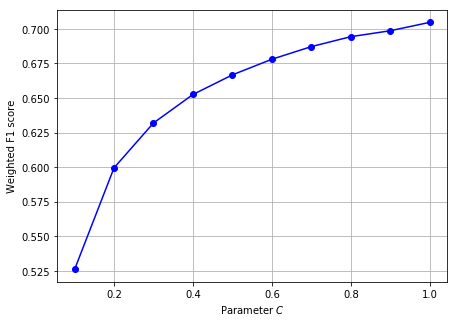

In [709]:
# Hyper Parameter Tuning
import matplotlib.pyplot as plt
hypers = np.arange(0.1, 1.1, 0.1)
res = []
for h in hypers:
    temp_model = train_classifier(X_train_tfidf, y_train, C=h, model='lr')
    temp_pred = f1_score(y_test, temp_model.predict(X_test_tfidf), average='weighted')
    res.append(temp_pred)
plt.figure(figsize=(7,5))
plt.plot(hypers, res, color='blue', marker='o')
plt.grid(True)
plt.xlabel('Parameter $C$')
plt.ylabel('Weighted F1 score')
plt.show()

In [710]:
#We fit the “best” model and create predictions for test set when 
#we are happy with the quality
# Final model
C = 1.0
classifier = train_classifier(X_train_tfidf, y_train, C=C, model='lr')
# Results
test_predictions =  classifier.predict(X_test_tfidf)
test_pred_inversed = mlb.inverse_transform(test_predictions)
test_pred_inversed

[(),
 ('convicted', 'criminals'),
 ('pirate', 'robber'),
 (),
 (),
 ('public',),
 ('drug', 'peddler'),
 ('drug', 'peddler'),
 ('bangladesh', 'nationalist', 'party'),
 ('hijacker',),
 (),
 (),
 ('public',),
 ('drug', 'peddler'),
 (),
 (),
 (),
 (),
 ('public',),
 ('drug', 'peddler'),
 (),
 ('convicted', 'criminals'),
 ('drug', 'peddler'),
 ('league', 'party'),
 ('pirate', 'robber'),
 ('bangladesh', 'nationalist', 'party'),
 (),
 ('convicted', 'criminals'),
 ('businessman', 'public'),
 ('bangladesh', 'hizbuttahrir'),
 ('bangladesh', 'nationalist', 'party'),
 ('convicted', 'criminals'),
 ('drug', 'peddler'),
 ('public',),
 ('public',),
 ('convicted', 'criminals'),
 ('awami', 'league'),
 ('drug', 'peddler'),
 ('public',),
 ('hijacker',),
 ('drug', 'peddler'),
 ('pirate', 'robber'),
 ('bangladesh', 'nationalist', 'party'),
 ('drug', 'peddler'),
 ('bangladesh', 'chhatro', 'league'),
 ('drug', 'peddler'),
 ('youth',),
 ('pirate', 'robber'),
 ('illicit', 'smuggler', 'traders'),
 (),
 ('pirate'

In [719]:
#Feature Imporance
def print_words_for_tag(classifier, tag, tags_classes, index_to_words, all_words):
    """
        classifier: trained classifier
        tag: particular tag
        tags_classes: a list of classes names from MultiLabelBinarizer
        index_to_words: index_to_words transformation
        all_words: all words in the dictionary
        
        return nothing, just print top 5 positive and top 5 negative words for current tag
    """
    print('Tag:\t{}'.format(tag))
    
    tag_n = np.where(tags_classes==tag)[0][0]
    
    model = classifier.estimators_[tag_n]
    top_positive_words = [index_to_words[x] for x in model.coef_.argsort().tolist()[0][-8:]]
    top_negative_words = [index_to_words[x] for x in model.coef_.argsort().tolist()[0][:8]]
    
    print('Top positive words:\t{}'.format(', '.join(top_positive_words)))
    print('Top negative words:\t{}\n'.format(', '.join(top_negative_words)))

print_words_for_tag(classifier, 'criminals', mlb.classes_, tfidf_reversed_vocab, ALL_WORDS)
print_words_for_tag(classifier, 'army', mlb.classes_, tfidf_reversed_vocab, ALL_WORDS)
print_words_for_tag(classifier, 'ansar', mlb.classes_, tfidf_reversed_vocab, ALL_WORDS)
print_words_for_tag(classifier, 'nationalist', mlb.classes_, tfidf_reversed_vocab, ALL_WORDS)
print_words_for_tag(classifier, 'awami', mlb.classes_, tfidf_reversed_vocab, ALL_WORDS)

Tag:	criminals
Top positive words:	rapist, murderer, drive terrorism, convicted, convict, criminal, convicts, criminals
Top negative words:	drug, clash, robber, youth, well, party, robbers, leader

Tag:	army
Top positive words:	dormitory, dope, done, domestic feud, domestic, domar, dispute, zias verdict
Top negative words:	#39, padma bridge, padma, paddy, paddling drugs, paddling drug, paddling, paddler

Tag:	ansar
Top positive words:	dormitory, dope, done, domestic feud, domestic, dollar, zias verdict, al islam
Top negative words:	#39, padma bridge, padma, paddy, paddling drugs, paddling drug, paddling, paddler

Tag:	nationalist
Top positive words:	activists, bangladesh, khaleda, dal, injured, election, bnp, nationalist
Top negative words:	party bnp, jamaat, drug, jamaat bangladesh, special drive, convicted, jamaateislam, electoral violence

Tag:	awami
Top positive words:	groups, chairman, supremacy, groups awami, intraparty clash, league, al, awami
Top negative words:	arrested, leagu

###VIOTYPEONE END

###WEAPTYPEONE START

###VIOTYPEONE END

### Topic Modelling End